#### Note: Latest May 21 (7.30pm) - OneHot Encoding (not...still get_dummies). Creating Kelly's 3 breed categories



## Reading in data and taking a quick look at some charts

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Read in csv
df = pd.read_csv("Austin_Animal_Center_Outcomes.csv")

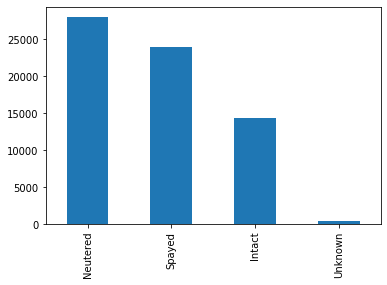

In [3]:
# Take a quick peak at charts

# Top Breeds
# df['Breed'].value_counts().head(20).plot.bar()

# Top Outcome_Types
# df['Breed'].value_counts().head(20).plot.bar()

# Sex split?
# df['Sex'].value_counts().head(20).plot.bar()

# Fixed?
df['Fixed'].value_counts().head(20).plot.bar()

# Age chart
# bins= [0,24,72,120]
# plt.hist(df.Age_month, bins=bins, edgecolor="k")
# plt.xticks(bins)
# plt.show()

In [4]:
df.loc[250:260, :]

,Animal_ID,Name,DateTime,MonthYear,Date_of_Birth,Outcome_Type,Outcome_Subtype,Fixed,Sex,Age_numeric,Age_time,Age_month,Breed,Color
250,A809527,*Cricket,12/11/2019 16:17,12/11/2019 16:17,10/18/2019,Adoption,Foster,Spayed,Female,1,month,1.0,Labrador Retriever Mix,Black/White
251,A797472,NaN,06/13/2019 06:59:00 PM,06/13/2019 06:59:00 PM,04/24/2019,Transfer,Partner,Intact,Female,1,month,1.0,Chihuahua Longhair Mix,Black/Tan
252,A742456,*Arrow,02/14/2017 06:27:00 PM,02/14/2017 06:27:00 PM,12/22/2016,Adoption,Foster,Spayed,Female,1,month,1.0,Pit Bull Mix,Brown/Black
253,A721330,*Glen,3/5/2016 17:40,3/5/2016 17:40,1/9/2016,Adoption,Foster,Neutered,Male,1,month,1.0,German Shepherd Mix,Tan
254,A697339,NaN,02/23/2015 06:36:00 PM,02/23/2015 06:36:00 PM,12/30/2014,Adoption,NaN,Spayed,Female,1,month,1.0,German Shepherd/Pit Bull,Brown
255,A695918,Clementine,01/29/2015 05:59:00 PM,01/29/2015 05:59:00 PM,11/30/2014,Adoption,NaN,Spayed,Female,1,month,1.0,Dachshund/Chihuahua Shorthair,Black/White
256,A809888,NaN,12/4/2019 12:05,12/4/2019 12:05,10/19/2019,Transfer,Partner,Intact,Female,1,month,1.0,Labrador Retriever/German Shepherd,Brown/White
257,A774855,NaN,7/10/2018 19:10,7/10/2018 19:10,05/21/2018,Transfer,Partner,Intact,Male,1,month,1.0,Australian Kelpie Mix,Brown/White
258,A750857,*Cinder,07/28/2017 10:37:00 PM,07/28/2017 10:37:00 PM,6/1/2017,Adoption,Foster,Spayed,Female,1,month,1.0,Great Pyrenees/American Bulldog,Black/White
259,A762939,NaN,11/30/2017 12:00:00 AM,11/30/2017 12:00:00 AM,09/30/2017,Transfer,Partner,Intact,Female,1,month,1.0,Pit Bull Mix,Brown/White


In [5]:
df.shape

(66804, 14)

## Cleaning
1. Drop unnessary columns
2. Drop rows where "Outcome_Type" is null
3. Drop rows where "Outcome_Type" is Return_To_Owner

In [6]:
# Quick check for missing values
df.apply(lambda x: sum(x.isnull()/len(df)))

Animal_ID          0.000000
Name               0.169496
DateTime           0.000000
MonthYear          0.000000
Date_of_Birth      0.000000
Outcome_Type       0.000000
Outcome_Subtype    0.688567
Fixed              0.000015
Sex                0.005673
Age_numeric        0.000000
Age_time           0.000000
Age_month          0.000000
Breed              0.000000
Color              0.000000
dtype: float64

In [7]:
# Drop unnessary columns
df2 = df.drop(columns=['Animal_ID', 'Name', 'DateTime', 'MonthYear', 'Date_of_Birth', 'Outcome_Subtype', 
                       'Age_numeric', 'Age_time' , 'Fixed'])

In [8]:
df2.shape
# df2.head()

(66804, 5)

In [9]:
# Drop rows where Outcome_Type is null

df2 = df2.loc[df2.Outcome_Type.notna(), ["Outcome_Type", "Sex", "Age_month", "Breed" ,"Color"]]

In [10]:
# Check for more nulls
df2.head()
df2.apply(lambda x: sum(x.isnull()/len(df2)))
df2.shape

(66804, 5)

In [11]:
# Have to fix the following columns "Sex"
df2 = df2.dropna(axis=0, subset=["Sex"])

In [12]:
# Verify that nulls from "Fixed" and "Sex" have been dropped
df2.apply(lambda x: sum(x.isnull()/len(df2)))
df2.shape

(66425, 5)

In [13]:
# # df2.groupby('Outcome_Type').count()
# df2.groupby('Color').count().sort_values('Outcome_Type', ascending=False)

In [14]:
# Drop all rows 'Return to Owner' ???  Assuming that chip is checked at intake

df3 = df2.drop(df2[df2.Outcome_Type == "Return to Owner"].index)

In [15]:
# Verify shape
df3.shape

(48025, 5)

In [16]:
# Verify group by counts (Return to Owner should be gone)
df3.groupby('Outcome_Type').count()

,Sex,Age_month,Breed,Color
Outcome_Type,,,,
Adoption,31395,31395,31395,31395
Died,209,209,209,209
Disposal,22,22,22,22
Euthanasia,1694,1694,1694,1694
Missing,29,29,29,29
Rto-Adopt,498,498,498,498
Transfer,14178,14178,14178,14178


In [17]:
# Anymore missing values before we move on?  If zero, then we are good.
df3.apply(lambda x: sum(x.isnull()/len(df3)))

Outcome_Type    0.0
Sex             0.0
Age_month       0.0
Breed           0.0
Color           0.0
dtype: float64

In [18]:
df3.shape

(48025, 5)

## Add new features?
1. New feature? - Mixed/Pure Breed? - COMPLETED!! 
2. Split breeds - COMPLETED!!
3. Color -  We have 333 unique color combinations. Hot encoding "Color" will create additional X features if we didn't do anything.  This would be unlikely to create a good performing model.
    *  Option 1 - We take any values occurring fewer than 300 times and places them into the “other” label. We use this to create a new feature called “Top_colors”.  Doing this would reduce 333 unique colors to 30 unique values - COMPLETED!
    *  Option 2 - Split to primary color vs secondary color? - COMPLETED!
4. Creating age groups - COMPLETED!!
5. Breeds - Hot encoding "Breed" will create additional 1,380 new features if we didn't do anything.  
6. New feature? - Single color/Multi color?

#### Creating a Mix/Pure Breed column - As of May 20 9pm, MIX doesn't do anything cause assuming all breeds are mixed.
#### Creating Kelly's 3 breed categories: 0 = mix, secondary not listed ; 1 = secondary breed listed; 2 = purebred

1. Create new MIX column (Kelly's 3 categories)
2. Split breed into breed_primary and breed_second


#### solution - Creating a Breed_category column AND Split into Breed_primary/Breed_second
* 0 = Breed has the word "Mix"
* 1 = If there are 2 breeds listed
* 2 = Only 1 breed in the primary (i.e. None in secondary OR Pure)

In [20]:
# Make a copy and add new column called Mix, set to 0
df4 = df3.copy()
df4["Breed_category"]=2
df4.head()

,Outcome_Type,Sex,Age_month,Breed,Color,Breed_category
0,Adoption,Female,1.000000,Border Collie Mix,Chocolate/White,2
1,Transfer,Male,0.066667,German Shepherd Mix,Brown,2
2,Transfer,Male,0.066667,Labrador Retriever Mix,Black/White,2
4,Transfer,Female,0.066667,Dachshund Mix,Brown,2
6,Transfer,Female,0.066667,Pit Bull Mix,Chocolate/White,2


In [21]:
df4.shape

(48025, 6)

In [22]:
df4.loc[200:210, :]

,Outcome_Type,Sex,Age_month,Breed,Color,Breed_category
200,Transfer,Female,0.2,Dachshund,Tan,2
201,Transfer,Male,0.2,Dachshund,Tan,2
205,Transfer,Female,0.2,German Shepherd/Rottweiler,Brown/Black,2
206,Transfer,Female,0.2,Labrador Retriever/Pit Bull,Brown Brindle,2
208,Transfer,Female,0.2,Rat Terrier Mix,White,2
209,Transfer,Female,0.2,Labrador Retriever/Pit Bull,Brown Brindle/White,2
210,Transfer,Male,0.2,Rat Terrier Mix,White,2


In [23]:
# Split Primary and Secondary
df4[['Breed_primary','Breed_second']] = df4.Breed.str.split("/", n=1, expand=True) 

In [24]:
df4.loc[200:210, :]

,Outcome_Type,Sex,Age_month,Breed,Color,Breed_category,Breed_primary,Breed_second
200,Transfer,Female,0.2,Dachshund,Tan,2,Dachshund,None
201,Transfer,Male,0.2,Dachshund,Tan,2,Dachshund,None
205,Transfer,Female,0.2,German Shepherd/Rottweiler,Brown/Black,2,German Shepherd,Rottweiler
206,Transfer,Female,0.2,Labrador Retriever/Pit Bull,Brown Brindle,2,Labrador Retriever,Pit Bull
208,Transfer,Female,0.2,Rat Terrier Mix,White,2,Rat Terrier Mix,None
209,Transfer,Female,0.2,Labrador Retriever/Pit Bull,Brown Brindle/White,2,Labrador Retriever,Pit Bull
210,Transfer,Male,0.2,Rat Terrier Mix,White,2,Rat Terrier Mix,None


In [26]:
# Find rows containing word "Mix" and set to 0
df4.loc[df4["Breed"].str.contains("Mix"), "Breed_category"] = 0

In [27]:
df4.loc[200:210, :]

,Outcome_Type,Sex,Age_month,Breed,Color,Breed_category,Breed_primary,Breed_second
200,Transfer,Female,0.2,Dachshund,Tan,2,Dachshund,None
201,Transfer,Male,0.2,Dachshund,Tan,2,Dachshund,None
205,Transfer,Female,0.2,German Shepherd/Rottweiler,Brown/Black,2,German Shepherd,Rottweiler
206,Transfer,Female,0.2,Labrador Retriever/Pit Bull,Brown Brindle,2,Labrador Retriever,Pit Bull
208,Transfer,Female,0.2,Rat Terrier Mix,White,0,Rat Terrier Mix,None
209,Transfer,Female,0.2,Labrador Retriever/Pit Bull,Brown Brindle/White,2,Labrador Retriever,Pit Bull
210,Transfer,Male,0.2,Rat Terrier Mix,White,0,Rat Terrier Mix,None


In [28]:
# Find rows containing word "/" and set to 1
df4.loc[df4["Breed"].str.contains("\/"), "Breed_category"] = 1

In [29]:
df4.loc[200:210, :]

,Outcome_Type,Sex,Age_month,Breed,Color,Breed_category,Breed_primary,Breed_second
200,Transfer,Female,0.2,Dachshund,Tan,2,Dachshund,None
201,Transfer,Male,0.2,Dachshund,Tan,2,Dachshund,None
205,Transfer,Female,0.2,German Shepherd/Rottweiler,Brown/Black,1,German Shepherd,Rottweiler
206,Transfer,Female,0.2,Labrador Retriever/Pit Bull,Brown Brindle,1,Labrador Retriever,Pit Bull
208,Transfer,Female,0.2,Rat Terrier Mix,White,0,Rat Terrier Mix,None
209,Transfer,Female,0.2,Labrador Retriever/Pit Bull,Brown Brindle/White,1,Labrador Retriever,Pit Bull
210,Transfer,Male,0.2,Rat Terrier Mix,White,0,Rat Terrier Mix,None


In [ ]:
# df4.groupby(['Mix']).count().sort_values("Breed", ascending=False).head(10)
# df4['Breed'].str.count('\/').sum()

In [ ]:
# Double checking slashes with isalpha() - About the same number.  Off by 2 
# removing white spaces 
# df4["Breed"]= df4["Breed"].str.replace(" ", "") 
# df4.loc[180:190, :]


In [ ]:
# creating bool series with new column 
# df4["bool_series2"]= df4["Breed"].str.isalpha()
# df4.loc[180:190, :]
# df4.groupby(['bool_series2']).count()

In [ ]:
# print(f'Pure breed: {48025-34048-8480}')

In [ ]:
# # Rename the breed WITHOUT the word MIX
# df4.loc[df4['Breed'].str.contains('Mix'), 'Breed'] = df4.loc[df4['Breed'].str.contains('Mix'), 'Breed'].str.replace(' Mix', '')

In [31]:
# How many unique breed combinations before split?
# Breed column - 1854

# How many unique breed combinations AFTER split?
# Breed_primary - 371
# Breed_second - 163

len(df4.Breed_second.value_counts())

163

In [34]:
breed_top10primary = [x for x in df4.Breed_primary.value_counts().sort_values(ascending=False).head(15).index]
breed_top10primary

df4.Breed_primary.value_counts().sort_values(ascending=False).head(15)

Pit Bull Mix                 5440
Labrador Retriever Mix       4937
Chihuahua Shorthair Mix      4653
German Shepherd Mix          2094
Labrador Retriever           2084
Chihuahua Shorthair          1344
Australian Cattle Dog Mix    1132
German Shepherd              1019
Pit Bull                     1015
Dachshund Mix                 774
Border Collie Mix             681
Boxer Mix                     656
Dachshund                     553
Australian Cattle Dog         544
Miniature Poodle Mix          540
Name: Breed_primary, dtype: int64

In [35]:
breed_top10second = [x for x in df4.Breed_second.value_counts().sort_values(ascending=False).tail(10).index]
breed_top10second

df4.Breed_second.value_counts().sort_values(ascending=False).head(10)

Labrador Retriever       1147
Chihuahua Shorthair       691
Pit Bull                  544
German Shepherd           471
Dachshund                 461
Australian Cattle Dog     369
Beagle                    299
Border Collie             262
Miniature Poodle          256
Boxer                     235
Name: Breed_second, dtype: int64

# QUESTION!  Should you not use breed_second?

#### Handling Color - Option 1 (Grouping colors)
* How does option1 effect RF/LogReg models?


In [41]:
# How many unique color combinations?  - 333
color_counts = df4['Color'].value_counts()
len(color_counts)
# print(df4['Color'].nunique())
color_counts.head(25)
# # Handling "Color" Option 1
# color_others = set(color_counts[color_counts < 300].index)
# df4['Top_colors'] = df4['Color'].replace(list(color_others), 'Others')
# print(df4['Top_colors'].nunique())

Black/White            5911
Tan/White              2695
Brown/White            2655
Black                  2504
White                  2345
Tan                    2231
Tricolor               1957
Black/Tan              1903
Brown                  1877
White/Black            1721
Black/Brown            1645
White/Brown            1549
Brown Brindle/White    1426
Blue/White             1329
White/Tan              1296
Brown/Black            1256
Red                     914
Red/White               876
Tan/Black               788
Brown Brindle           757
Chocolate/White         664
Cream                   489
Sable                   420
Yellow                  386
Fawn/White              357
Name: Color, dtype: int64

In [42]:
df4.head()


,Outcome_Type,Sex,Age_month,Breed,Color,Breed_category,Breed_primary,Breed_second
0,Adoption,Female,1.000000,Border Collie Mix,Chocolate/White,0,Border Collie Mix,None
1,Transfer,Male,0.066667,German Shepherd Mix,Brown,0,German Shepherd Mix,None
2,Transfer,Male,0.066667,Labrador Retriever Mix,Black/White,0,Labrador Retriever Mix,None
4,Transfer,Female,0.066667,Dachshund Mix,Brown,0,Dachshund Mix,None
6,Transfer,Female,0.066667,Pit Bull Mix,Chocolate/White,0,Pit Bull Mix,None


In [60]:
# Add new column called Color_new and set to Color
df5 = df4.copy()
df5["Color_new"]=df4["Color"]
df5.head()
df5.loc[320:330, :]

,Outcome_Type,Sex,Age_month,Breed,Color,Breed_category,Breed_primary,Breed_second,Color_new
320,Transfer,Male,1.0,Labrador Retriever/Border Collie,Black/White,1,Labrador Retriever,Border Collie,Black/White
321,Adoption,Male,1.0,Labrador Retriever Mix,Black,0,Labrador Retriever Mix,None,Black
322,Adoption,Female,1.0,Queensland Heeler Mix,Red Tick,0,Queensland Heeler Mix,None,Red Tick
323,Transfer,Female,1.0,Pit Bull Mix,Gray/White,0,Pit Bull Mix,None,Gray/White
324,Adoption,Female,1.0,Golden Retriever/Labrador Retriever,Brown/White,1,Golden Retriever,Labrador Retriever,Brown/White
325,Adoption,Male,1.0,American Staffordshire Terrier Mix,Brown Brindle/White,0,American Staffordshire Terrier Mix,None,Brown Brindle/White
326,Adoption,Female,1.0,Australian Shepherd Mix,Brown Brindle/White,0,Australian Shepherd Mix,None,Brown Brindle/White
327,Transfer,Female,1.0,German Shepherd Mix,Black/Brown,0,German Shepherd Mix,None,Black/Brown
328,Adoption,Female,1.0,Australian Cattle Dog/Australian Shepherd,White/Tan,1,Australian Cattle Dog,Australian Shepherd,White/Tan
329,Adoption,Male,1.0,Pit Bull,White,2,Pit Bull,None,White


In [67]:
# Can't do this code here.  It takes COMBI tan/white and changes that to tan!  WRONG!!  I only want tan c


# Find rows containing colors: Gold/Yellow/Tan/Fawn/Buff/Apricot/Cream and set all to YELLOW
# df5.loc[df5["Color"].str.contains('Gold|Yellow|Tan|Fawn|Buff|Apricot|Cream'), "Color_new"] = "Tan"
# df5.loc[264:267, :]

,Outcome_Type,Sex,Age_month,Breed,Color,Breed_category,Breed_primary,Breed_second,Color_new
264,Adoption,Male,1.0,Pit Bull Mix,Blue/White,0,Pit Bull Mix,None,Blue/White
265,Transfer,Male,1.0,Miniature Poodle Mix,Apricot,0,Miniature Poodle Mix,None,Tan
266,Euthanasia,Male,1.0,Pit Bull Mix,Tan/White,0,Pit Bull Mix,None,Tan
267,Transfer,Male,1.0,Plott Hound Mix,Brown Brindle/White,0,Plott Hound Mix,None,Brown Brindle/White


#### Handling Color - Option 2 (Split and have intaker check all colors that apply)
* How does option2 effect RF/LogReg models?

In [ ]:
# Split Top_color column into color1, color2
df3[['Color1','Color2']] = df3.Color.str.split("/", n=1, expand=True) 

In [ ]:
df3.loc[150:160, :]

In [ ]:
# How many unique colors? - 333 unique color combinations
# df4.Color.value_counts().sort_values(ascending=False).head(20)
# len(df3.Color.value_counts())

# # How many unique colors in COLOR1? - 37
# len(df3.Color1.value_counts())

# How many unique colors in COLOR2? - 34
len(df3.Color2.value_counts())

In [ ]:
color_top10Color1 = [x for x in df3.Color1.value_counts().sort_values(ascending=False).head(30).index]
color_top10Color1

df3.Color1.value_counts().sort_values(ascending=False).head(40)

In [ ]:
color_top10Color2 = [x for x in df3.Color2.value_counts().sort_values(ascending=False).head(10).index]
color_top10Color2

df3.Color2.value_counts().sort_values(ascending=False).head(40)

# QUESTION!  Should you simplify the color intake?  

#### Creating age categories
* Baby: <=6months
* Young: 7months-24 months
* Adult: 2 years-7years
* Senior: 7+

In [ ]:
df3['Pet_age_category'] = pd.cut(x=df3['Age_month'], bins=[0, 6, 24, 84,240], labels=['Baby', 'Young', 'Adult', 'Senior'])

In [ ]:
df3.loc[50000:50020, :]
df3.tail()

In [ ]:
# What's the breakdown by Pet_age_category after binning??
df3.Pet_age_category.value_counts().sort_values(ascending=False).head(10)

## Changing to Binary Outcome - Take the dog or Don't take the dog?
* Positive Outcome is Adoption - Take in the dog
* Negative Outcome is a combination of Transfer, Euthanized and Death categories - Don't take in the dog

In [ ]:
# Create new BINARY_OUTCOME column and set to 0

df3["Binary_outcome"]="Negative"
df3.head()

In [ ]:
# Find rows containing word "Adoption" and set to 1 (for Positive Outcome)
# All other rows will be 0 (for Negative Outcome)

df3.loc[df3["Outcome_Type"].str.contains("Adoption"), "Binary_outcome"] = "Positive"

In [ ]:
df3.loc[200:300, :]

## Still get_dummies

In [ ]:
df3.head()

In [ ]:
# Drop these columns:
# Outcome_Type column since we now have Binary_outcome 
# Age_month since we have Pet_age_category
# Breed since we have Breed_primary, Breed_second     - SHOULD BE DROP BREED_SECOND??
# Color since we have Color1, Color2
df4 = df3.drop(columns=['Outcome_Type','Age_month', 'Breed', 'Color' ])

# QUESTION!  
1. Should be take out BREED_SECOND? - Dont get_dummy Breed_second
2. Should be take out COLOR2?

In [ ]:
df4.head()

In [ ]:
# # import preprocessing from sklearn
# from sklearn.preprocessing import LabelEncoder

In [ ]:
# df5.dtypes

In [ ]:
# V1 - all in
# df6 = pd.get_dummies(df5[['Fixed', 'Sex', 'Mix', 'Breed_primary', 'Breed_second', 'Color1', 'Color2', 'Pet_age_category', 'Binary_outcome']])
# df6.loc[5120:5130, :]

# V2 - took out 'Breed_second'
# df6 = pd.get_dummies(df5[['Fixed', 'Sex', 'Mix', 'Breed_primary', 'Color1', 'Color2', 'Pet_age_category', 'Binary_outcome']])
# df6.loc[5120:5130, :]

# V3 - took out 'Breed_second' AND 'Color2'   
df5 = pd.get_dummies(df4[['Sex', 'Breed_primary', 'Color1', 'Pet_age_category', 'Binary_outcome']])
df5.head()

In [ ]:
df5.columns

In [ ]:
# Define X and y
X = df5.drop(['Binary_outcome_Negative', 'Binary_outcome_Positive','Sex_Female', 'Pet_age_category_Senior', 'Color1_Tricolor','Breed_primary_Affenpinscher Mix'], axis="columns")
y = df5[['Binary_outcome_Positive']]

In [ ]:
X.shape

In [ ]:
y.shape

## Random Forest model


In [ ]:
# Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# Import, initialize, fit and predict
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 10) 
rf_model.fit(X_train, y_train)
predict_y_test = rf_model.predict(X_test)

In [ ]:
# Validate - run accuracy score
from sklearn import metrics
print("Accuracy score: ", metrics.accuracy_score(y_test, predict_y_test))

In [ ]:
# RF Feature importance?
feature_list = list(X.columns)
feature_importance = pd.Series(rf_model.feature_importances_, index=feature_list).sort_values(ascending=False) 
print(feature_importance[0:20])

In [ ]:
# Validate with cross validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_model, X, y, cv=10, scoring="accuracy")
print(scores)

In [ ]:
scores.mean()

## Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()
logReg.fit(X_train, y_train)

In [ ]:
print(f"Training Data Score: {logReg.score(X_train, y_train)}")
print(f"Testing Data Score: {logReg.score(X_test, y_test)}")

## Naive Bayes model


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
nb_model = GaussianNB()

# Train the model using the training sets
nb_model.fit(X_train, y_train)

#Predict Output
y_predicted= nb_model.predict(X_test)


In [ ]:
print(y_predicted)

In [ ]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_predicted))

## SVM


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)  

target = df5["Binary_outcome_Negative"]
target_names = [0, 1]


In [ ]:
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

In [ ]:
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

In [ ]:
 # Calculate classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))